In [12]:
import sdl2.ext
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

from SH import PolygonClipper

def liang():
    lines = []

    with open('D:\BSU\BSU\sem6\Computer graphics\lab5\input1.txt', 'r') as f:
        N = int(f.readline())    
        for i in range(N):
            x1, y1, x2, y2 = map(int, f.readline().split())
            lines.append((x1, y1, x2, y2))

        x_min, y_min, x_max, y_max = map(int, f.readline().split())

    fig, ax = plt.subplots()

    ax.plot([x_min, x_max], [y_min, y_min], color='blue', linewidth=3)
    ax.plot([x_min, x_max], [y_max, y_max], color='blue', linewidth=3)
    ax.plot([x_min, x_min], [y_min, y_max], color='blue', linewidth=3)
    ax.plot([x_max, x_max], [y_min, y_max], color='blue', linewidth=3)

    for line in lines:
        x1, y1, x2, y2 = line
        ax.plot([x1, x2], [y1, y2], color='black', linewidth=2)

    ax.grid(linestyle='--')

    for line in lines:
        x1, y1, x2, y2 = line
        line = sdl2.ext.algorithms.liangbarsky(x_min, y_max, x_max, y_min, x1, y1, x2, y2)
        ax.plot([line[0], line[2]], [line[1], line[3]], color='red', linewidth=3)

    plt.show()


def hodgman():
    polygon1 = []
    polygon2 = []

    with open('D:\BSU\BSU\sem6\Computer graphics\lab5\input2.txt', 'r') as f:
        n1 = int(f.readline())    
        for i in range(n1):
            x1, y1 = map(int, f.readline().split())
            polygon1.append((x1, y1))

        n2 = int(f.readline())    
        for i in range(n2):
            x1, y1 = map(int, f.readline().split())
            polygon2.append((x1, y1))

    polygon_path_1 = Path(polygon1)
    polygon_patch_1 = PathPatch(polygon_path_1, facecolor='blue', edgecolor='blue')
    polygon_path_2 = Path(polygon2)
    polygon_patch_2 = PathPatch(polygon_path_2, facecolor='pink', edgecolor='y')
    fig, ax = plt.subplots()
    ax.add_patch(polygon_patch_1)
    ax.add_patch(polygon_patch_2)
    
    ax.set_xlim(min(x for x, y in polygon1 + polygon2) - 1, max(x for x, y in polygon1 + polygon2) + 1)
    ax.set_ylim(min(y for x, y in polygon1 + polygon2) - 1, max(y for x, y in polygon1 + polygon2) + 1)

    ax.grid(linestyle='--')

    clip = PolygonClipper(warn_if_empty = False)

    clipped_polygon = clip(polygon1,polygon2)
    polygon_path_3 = Path(clipped_polygon)
    polygon_patch_3 = PathPatch(polygon_path_3, facecolor='purple', edgecolor='purple')
    ax.add_patch(polygon_patch_3)

    plt.show()

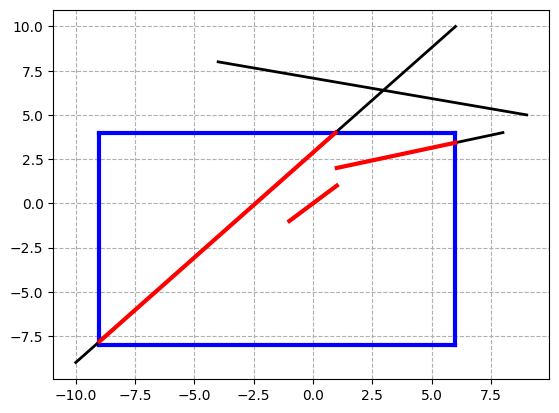

In [13]:
liang()

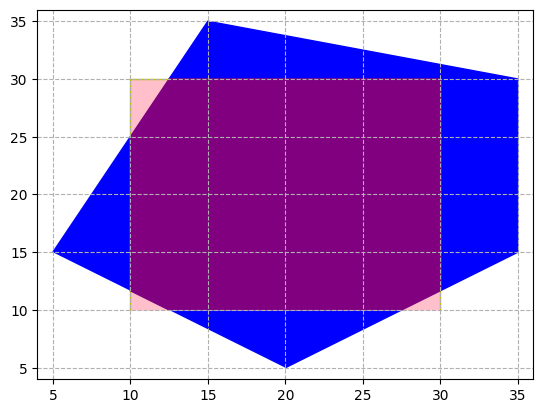

In [14]:
hodgman()